In [38]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

! pip install plotly
import plotly.express as px

In [39]:
df = pd.read_csv('final_cleaned.csv')

In [40]:
success_rate = 4000000

df.loc[(df["status"]==1)&(df['total_raised']>success_rate), 'succeeded'] = 1
df.loc[(df["status"]==0)|(df['total_raised']<=success_rate), 'succeeded'] = 0

In [41]:
cat_cols = ['founded', 'business model','employees','product stage','status','fund_stage','succeeded']
num_cols = ['total_raised','total_rounds', 'investors','ipo_price', 'geo_market_per']
tag_cols = [col for col in df.columns if col.startswith('tag_')]
targetmarket_cols = [col for col in df.columns if col.startswith('targetmarket_')]
sector_list = [col for col in df.columns if col.startswith("sector_")]
target_ind_list = [col  for col in df.columns if col.startswith("target_industry_")]
technology_list = [col  for col in df.columns if col.startswith("core_technology_")]
bin_cols = tag_cols + targetmarket_cols + sector_list + target_ind_list + technology_list

In [42]:
print(f'tag_cols: {len(tag_cols)} \ntargetmarket_cols: {len(targetmarket_cols)} \nsector_list: {len(sector_list)}\ntarget_ind_list: {len(target_ind_list)}\ntechnology_list: {len(technology_list)}')

tag_cols: 2340 
targetmarket_cols: 259 
sector_list: 60
target_ind_list: 97
technology_list: 94


In [16]:
technology_list

['core_technology_Artificial Intelligence',
 'core_technology_Biologicals',
 'core_technology_Biologicals_Cells',
 'core_technology_Materials & Substances',
 'core_technology_Machinery & Robotics',
 'core_technology_Sensing',
 'core_technology_Materials & Substances_Raw Materials',
 'core_technology_Machinery & Robotics_Drones',
 'core_technology_Machinery & Robotics_Processing Machinery',
 'core_technology_Artificial Intelligence_Computer Vision',
 'core_technology_Artificial Intelligence_Deep Learning',
 'core_technology_Artificial Intelligence_Machine Learning',
 'core_technology_Platforms & Interfaces',
 'core_technology_Platforms & Interfaces_Software',
 'core_technology_Simulation & Imaging',
 'core_technology_Simulation & Imaging_Digital Twin',
 'core_technology_Materials & Substances_Polymers',
 'core_technology_Materials & Substances_Silicon',
 'core_technology_Biologicals_Molecules',
 'core_technology_Artificial Intelligence_Image Recognition',
 'core_technology_Sensing_LIDAR

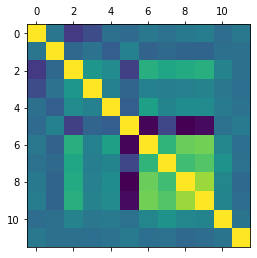

In [15]:
plt.matshow(df[cat_cols+num_cols].corr())
plt.show()

In [25]:
df[df['core_technology_Artificial Intelligence'] == 1]

,Unnamed: 0,company_name,company_about,founded,business model,employees,product stage,status,fund_stage,total_raised,...,core_technology_Data Storage_Flash,core_technology_Machinery & Robotics_Cobots,core_technology_Sensing_SWIR,core_technology_Materials & Substances_Adhesive,core_technology_Materials & Substances_Nonwoven Fabric,core_technology_Materials & Substances_Insulation,core_technology_Sensing_Scent,core_technology_Machinery & Robotics_Exoskeleton,core_technology_Materials & Substances_Implants,succeeded
0,0,Tastewise,Tastewise is an AI platform designed to help f...,2017,0,4,5,1,0,21500000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,8,vHive,vHive is developing a software system that wil...,2016,0,1,5,1,2,36500000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11,11,Midnight Robotics,Midnight Robotics creates retrofitting kits de...,2019,0,1,5,0,10,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,16,Sowillo Energy,Sowillo provides a solution for efficient wate...,2014,2,0,4,1,9,600000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,17,Beewise,Beewise offers autonomous beehives that operat...,2018,0,4,5,1,4,118700000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10049,10049,Anachoic,Anachoic develops technologies to improve the ...,2018,8,0,4,1,9,2300000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10054,10054,AiDock,AiDock has developed an automated customs clea...,2018,0,1,5,1,0,1300000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10056,10056,Moodify,"Moodify uses neuroscience, bioinformatics, and...",2017,3,1,5,1,0,10700000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10064,10064,ADASKY,ADASKY develops and manufactures intelligent t...,2015,0,4,5,1,2,55000000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [30]:
rs = np.random.RandomState(0)

corr = df[num_cols + cat_cols].corr()
corr.style.background_gradient(cmap='PuOr_r')
# 'coolwarm', 'RdBu_r', 'BrBG_r', & 'PuOr_r' are other good diverging colormaps

,total_raised,total_rounds,investors,ipo_price,geo_market_per,founded,business model,employees,product stage,status,fund_stage,succeeded
total_raised,1.000000,0.501616,0.569196,0.214451,-0.018627,-0.014680,-0.061596,0.330744,0.069852,0.111499,-0.275268,0.440124
total_rounds,0.501616,1.000000,0.757760,0.120475,-0.067275,0.031644,-0.099768,0.370414,0.083530,0.167416,-0.621010,0.631387
investors,0.569196,0.757760,1.000000,0.110754,-0.043530,0.056812,-0.099976,0.397835,0.101951,0.161806,-0.574154,0.657729
ipo_price,0.214451,0.120475,0.110754,1.000000,0.003348,-0.041227,-0.019921,0.101179,0.021167,0.044373,-0.019219,0.123995
geo_market_per,-0.018627,-0.067275,-0.043530,0.003348,1.000000,0.025823,-0.019887,-0.024354,-0.028932,-0.001084,0.039439,-0.028206
founded,-0.014680,0.031644,0.056812,-0.041227,0.025823,1.000000,0.013373,-0.346733,-0.235997,-0.021622,-0.053046,0.029362
business model,-0.061596,-0.099768,-0.099976,-0.019921,-0.019887,0.013373,1.000000,-0.080074,-0.002876,-0.135131,0.088798,-0.104140
employees,0.330744,0.370414,0.397835,0.101179,-0.024354,-0.346733,-0.080074,1.000000,0.230098,0.159215,-0.312352,0.403141
product stage,0.069852,0.083530,0.101951,0.021167,-0.028932,-0.235997,-0.002876,0.230098,1.000000,0.089469,-0.093718,0.091142
status,0.111499,0.167416,0.161806,0.044373,-0.001084,-0.021622,-0.135131,0.159215,0.089469,1.000000,-0.136039,0.300522


In [31]:

fig = px.imshow(df[num_cols + cat_cols].corr())
fig.show()

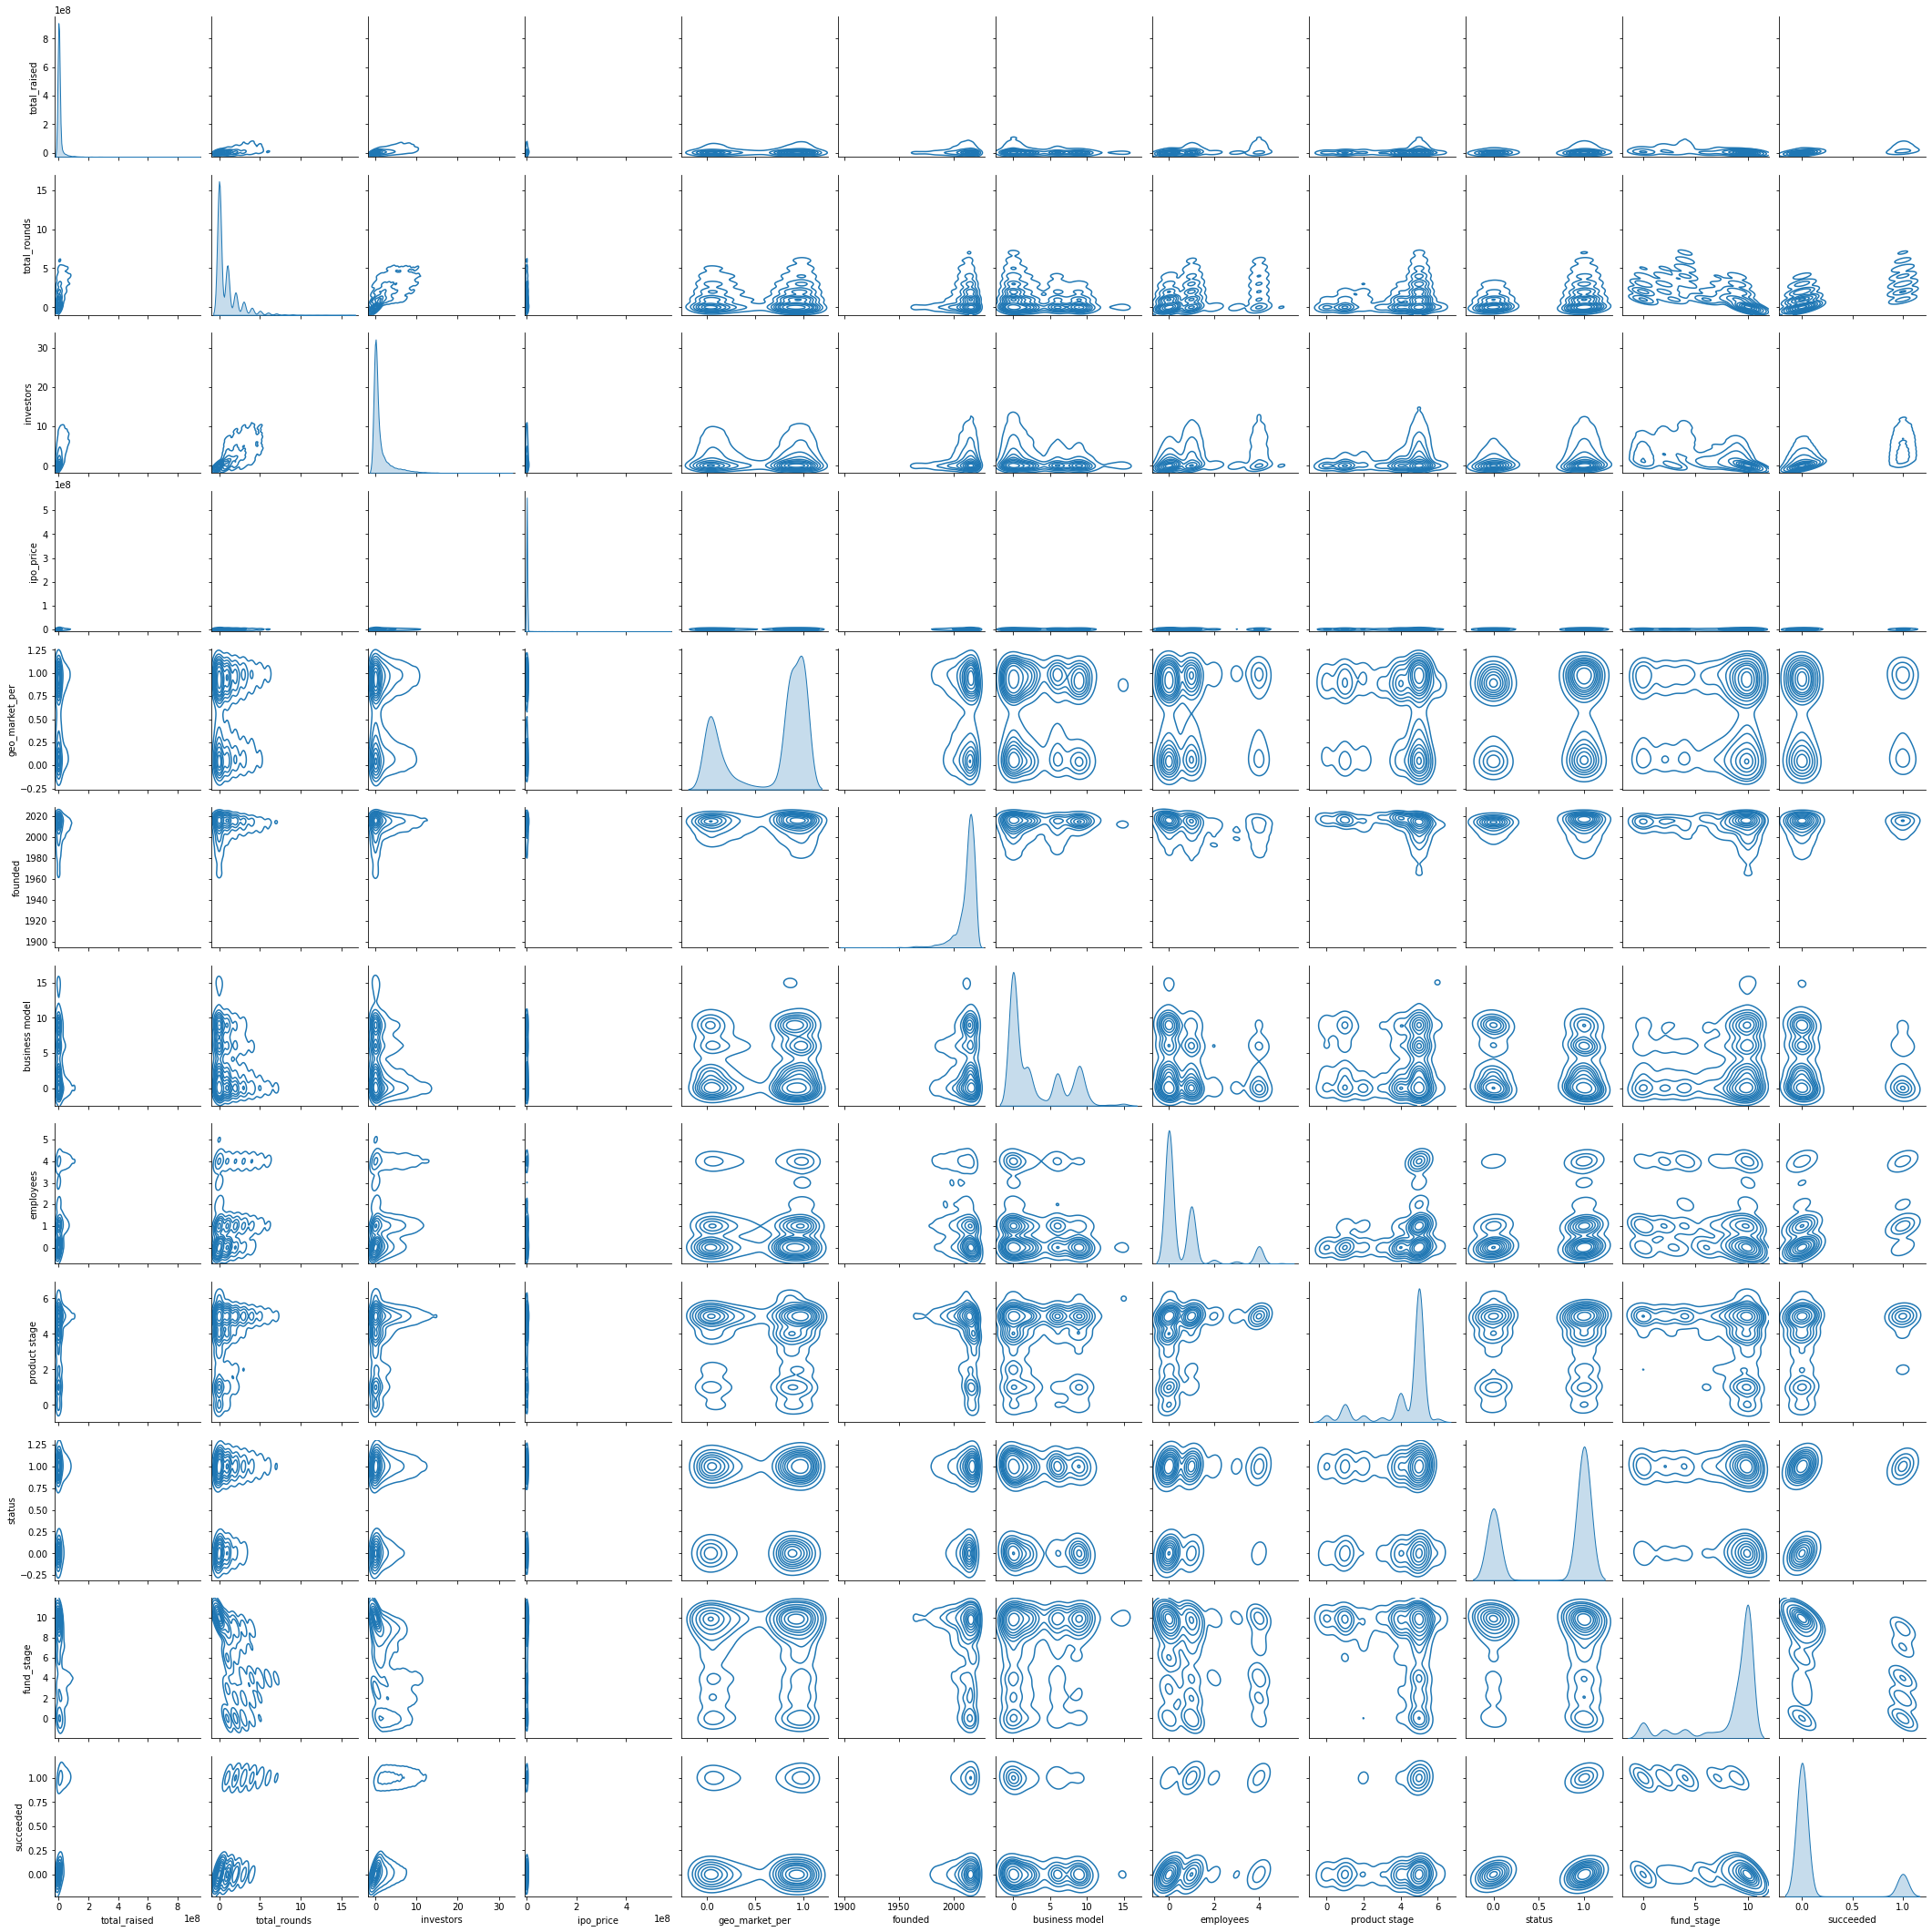

In [43]:
# rs = np.random.RandomState(0)
# df2 = pd.DataFrame(rs.rand(10, 10))
sns.pairplot(df[num_cols+ cat_cols], kind='kde')